In [59]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import colors
from matplotlib import patches
from matplotlib import animation

#Model constants
num_cells = 2
duration = 1000
start = [500, 500]

In [25]:
# NEW ANGLE FUNCTION
def getangle():
    #Sample the new direction unformly from 0 to 2pi, record as a float

    # I DONT KNOW WHAT IS THE CODE FOR THE EXTRACTION FROM THE BUILT DISTRIBUTIONS BUT HERE IT JUST REPLACES THE np.random.uniform(low = 0.0, high = 2 * math.pi)
    new_dir = np.random.uniform(low = 0.0, high = 2 * math.pi)
        
    projection_h = math.cos(new_dir) #displacement projected on Horizontal direction for next run, float
    projection_v = math.sin(new_dir) #displacement projected on Vertical direction for next run, float
    
    return projection_h, projection_v

In [26]:
def getrunlength():
    # AGAIN FROM OUR DISTRIBUTION
    runlength = np.random.exponential(1)
    return runlength

In [27]:
#NEW RUN DURATION
def run_duration():
    # FROM THE BUILT DISTRIBUTION
    curr_run_time = np.random.exponential(1)
    return curr_run_time

In [66]:
#NEW RANDOM SIMULATION WITH BUILT DISTRIBUTIONS
def Nsimulate_std_random(num_cells, duration):
    
    #Takes the shape (num_cells, duration+1, 2)
    #any point [x,y] on the simulated trajectories can be accessed via paths[cell, time]
    paths = np.zeros((num_cells, duration + 1, 2))

    for rep in range(num_cells):
        # Initialize simulation
        t = 0 #record the time elapse
        curr_position = np.array(start) #start at [0, 0] ???
        projection_h, projection_v = getangle() #Initialize direction randomly
        past_sec = 0

        while t < duration:
            
            #run
            curr_run_time = run_duration() #get run duration, float
            run_length = getrunlength()
            projection = np.array([projection_h, projection_v])
            displacement = projection * run_length
            #update current position by summing old position and displacement
            curr_position = curr_position + displacement
            
            #tumble
            projection_h, projection_v = getangle()
            
            #increment time
            t += curr_run_time

            #record position approximate for integer number of second
            curr_sec = int(t)
            for sec in range(past_sec, min(curr_sec, duration) + 1):
                #fill values from last time point to current time point
                paths[rep, sec] = curr_position.copy()
                past_sec= curr_sec
    return paths

In [67]:
#THE ACTUAL SIMULATION
paths = Nsimulate_std_random(num_cells, duration)

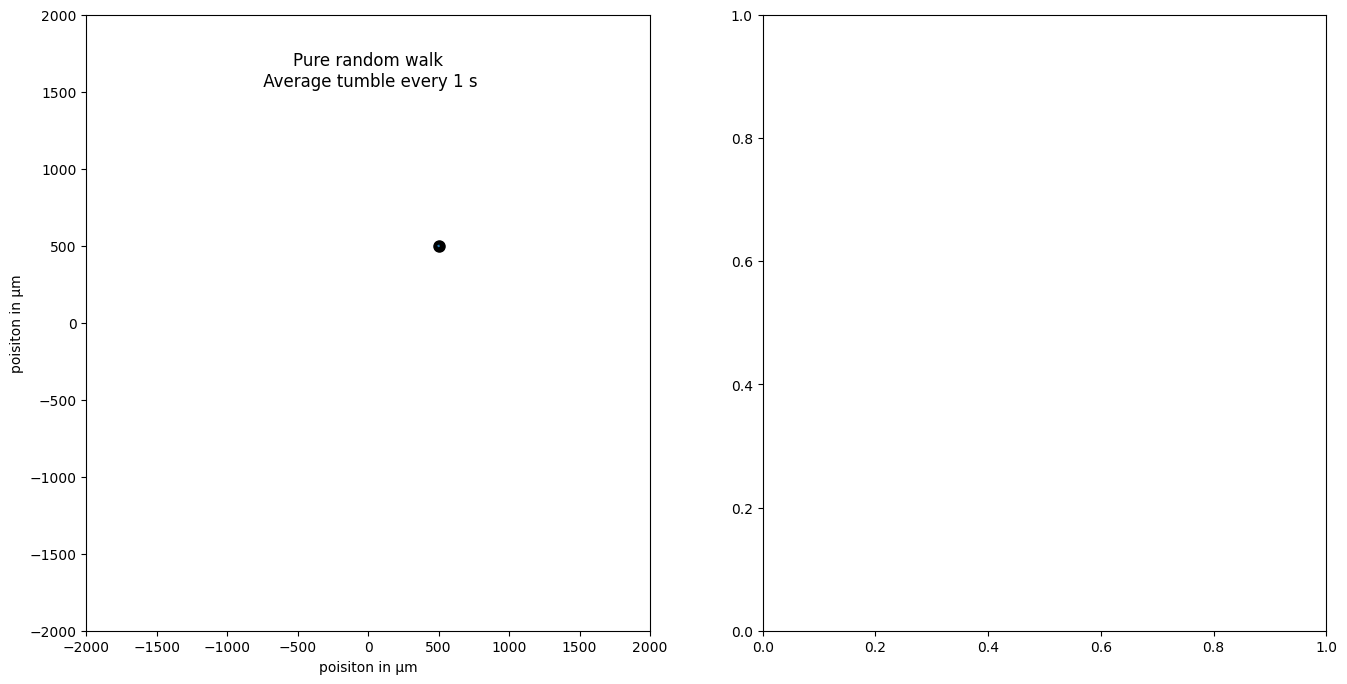

In [35]:
#THIS IS NOT WORKING 
#Below are all for plotting purposes
methods = ["Pure random walk", "Chemotactic random walk"]
fig, ax = plt.subplots(1, 2, figsize = (16, 8)) #1*2 subplots, size 16*8
coord_array = paths[0,:]
x = [coord[0] for coord in coord_array]
y = [coord[1] for coord in coord_array]
print(len(x))


#Repeat for the two strategies
for m in range(1):
    #Simulate the gradient distribution, plot as a heatmap

    #Plot simulation results
    time_frac = 1.0 / duration

    ax[m].plot(start[0], start[1], 'ko', markersize = 8) #Mark the starting point [0, 0]  


    ax[m].set_title("{}\n Average tumble every 1 s".format(methods[m]), x = 0.5, y = 0.87)
    ax[m].set_xlim(-2000, 2000)
    ax[m].set_ylim(-2000, 2000)
    ax[m].set_xlabel("poisiton in μm")
    ax[m].set_ylabel("poisiton in μm")
    #for n in range(num_cells):
        #ax[m].plot(paths[n,:][0],paths[n,:][1])


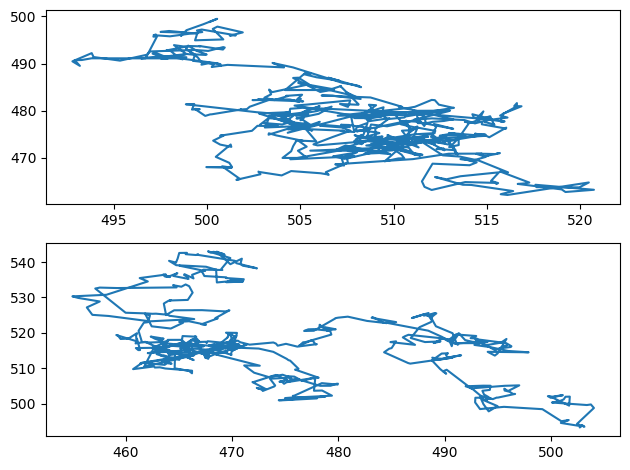

In [68]:
#THIS PLOTTING IS WORKING
fig , axes =plt.subplots(num_cells,1)

for i in range(num_cells):
    ax = axes[i]
    coord_array = paths[i,:]
    x = [coord[0] for coord in coord_array]
    y = [coord[1] for coord in coord_array]
    ax.plot(x,y)

plt.tight_layout()
plt.show()

In [65]:
print(paths[1,:])

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
